In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# 1. Database Connection and Setup
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [10]:
# Drop the table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")


In [11]:
# Create the sales table
cursor.execute("""
CREATE TABLE sales (
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

In [12]:
# Insert sample data
sample_data = [
    ('Laptop', 5, 1200.00),
    ('Mouse', 20, 25.00),
    ('Keyboard', 12, 75.00),
    ('Monitor', 8, 300.00),
    ('Laptop', 3, 1200.00),
    ('Mouse', 15, 25.00)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [13]:
# 2. Run SQL Query and Load Data
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product;
"""
df = pd.read_sql_query(query, conn)
conn.close()


Sales Summary by Product:
    product  total_qty  revenue
0  Keyboard         12    900.0
1    Laptop          8   9600.0
2   Monitor          8   2400.0
3     Mouse         35    875.0


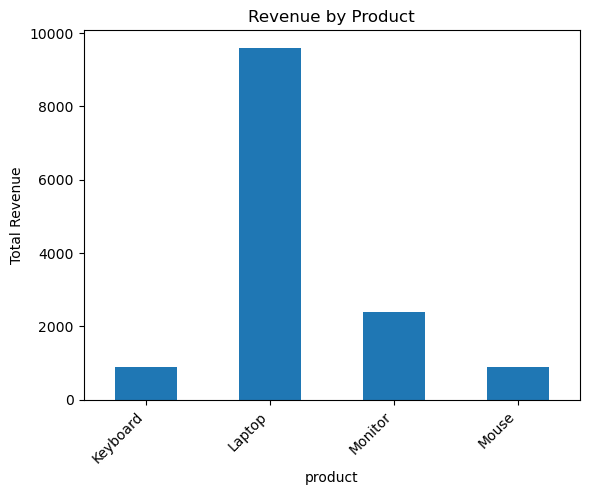

In [14]:
# 3. Display Results and Chart
print("Sales Summary by Product:")
print(df)

df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()
# Optional: To save the chart
# plt.savefig("sales_chart.png")